In [1]:
from bs4 import BeautifulSoup
from requests import get
url = 'https://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'
response = get(url)
print(response.text[:500])



<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle",


In [2]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [3]:
#Now let’s use the find_all() method to extract all the div containers that have a class attribute of lister-item mode-advanced:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [4]:
first_movie = movie_containers[0]
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>
<p class="text-muted">
<span class="certificate">R</span>
<span class="ghost">|</span>
<span class="runtime">137 min</span>
<span class="ghost">|</span>
<span class="genre">
Action, Drama, Sci-Fi            </span>
<

In [5]:
## MOVIE year
first_movie.h3.a.text
## Year
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year = first_year.text
first_year
## Rating
first_movie.strong
first_imdb = float(first_movie.strong.text)
first_imdb

8.1

In [10]:
### Metascore
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
print(first_mscore)


77


In [14]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes['data-value']
first_votes = int(first_votes['data-value'])
first_votes

664138

In [20]:
Votes_Gross = first_movie.find('p', class_ = 'sort-num_votes-visible')
Votes_Gross.text

'\nVotes:\n664,138\n| Gross:\n$226.28M\n'

In [22]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Extract data from individual movie container
for container in movie_containers:
# If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
    # The name
        name = container.h3.a.text
        names.append(name)
    # The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
    # The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
    # The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
    # The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

In [23]:
import pandas as pd
test_df = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      42 non-null     object 
 1   year       42 non-null     object 
 2   imdb       42 non-null     float64
 3   metascore  42 non-null     int64  
 4   votes      42 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ KB
None


,movie,year,imdb,metascore,votes
0,Logan,(2017),8.1,77,664138
1,Thor: Ragnarok,(2017),7.9,74,611186
2,Wonder Woman,(2017),7.4,76,591155
3,Guardians of the Galaxy Vol. 2,(2017),7.6,67,585905
4,Star Wars: Episode VIII - The Last Jedi,(2017),7.0,84,575088
5,Dunkirk,(2017),7.8,94,571521
6,Spider-Man: Homecoming,(2017),7.4,73,529491
7,Get Out,(I) (2017),7.7,85,506907
8,Blade Runner 2049,(2017),8.0,81,477154
9,It,(I) (2017),7.3,69,469036


### Scraping Multiple Pages

In [25]:
#Create a list called pages, and populate it with the strings corresponding to the first 4 pages.
#Create a list called years_url and populate it with the strings corresponding to the years 2000-2017.
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]

Controlling the rate of crawling is beneficial for us, and for the website we are scraping. If we avoid hammering the server with tens of requests per second, then we are much less likely to get our IP address banned. We also avoid disrupting the activity of the website we scrape by allowing the server to respond to other users’ requests too.

We’ll control the loop’s rate by using the sleep() function from Python’s time module. sleep() will pause the execution of the loop for a specified amount of seconds.

To mimic human behavior, we’ll vary the amount of waiting time between requests by using the randint() function from the Python’s random module. randint() randomly generates integers within a specified interval.

In [27]:
from time import sleep
from random import randint

### Monitoring the loop as it’s still going
Given that we’re scraping 72 pages, it would be nice if we could find a way to monitor the scraping process as it’s still going. This feature is definitely optional, but it can be very helpful in the testing and debugging process. Also, the greater the number of pages, the more helpful the monitoring becomes. If you are going to scrape hundreds or thousands of web pages in a single code run, I would say that this feature becomes a must.

For our script, we’ll make use of this feature, and monitor the following parameters:

The frequency (speed) of requests, so we make sure our program is not overloading the server.
The number of requests, so we can halt the loop in case the number of expected requests is exceeded.
The status code of our requests, so we make sure the server is sending back the proper responses.
To get a frequency value we’ll divide the number of requests by the time elapsed since the first request. This is similar to computing the speed of a car – we divide the distance by the time taken to cover that distance. Let’s experiment with this monitoring technique at a small scale first. In the following code cell we will:

Set a starting time using the time() function from the time module, and assign the value to start_time.
Assign 0 to the variable requests which we’ll use to count the number of requests.
Start a loop, and then with each iteration:
Simulate a request.
Increment the number of requests by 1.
Pause the loop for a time interval between 8 and 15 seconds.
Calculate the elapsed time since the first request, and assign the value to elapsed_time.
Print the number of requests and the frequency.

In [31]:
from time import time
start_time = time()
requests = 0
for _ in range(5):
# A request would go here
    requests += 1
    sleep(randint(1,3))
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))

Request: 1; Frequency: 0.4982479431834192 requests/s
Request: 2; Frequency: 0.6619020224028285 requests/s
Request: 3; Frequency: 0.4977196031537519 requests/s
Request: 4; Frequency: 0.44307356999694525 requests/s
Request: 5; Frequency: 0.41536225073659067 requests/s


Since we’re going to make 72 requests, our work will look a bit untidy as the output accumulates. To avoid that, we’ll clear the output after each iteration, and replace it with information about the most recent request. To do that we’ll use the clear_output()function from the IPython’s core.display module. We’ll set the wait parameter of clear_output() to True to wait with replacing the current output until some new output appears.

In [33]:
from IPython.core.display import clear_output
start_time = time()
requests = 0
for _ in range(5):
# A request would go here
    requests += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
clear_output(wait = True)

Request: 1; Frequency: 0.49673439166172023 requests/s
Request: 2; Frequency: 0.6619172731237429 requests/s
Request: 3; Frequency: 0.5961647241706143 requests/s
Request: 4; Frequency: 0.568779303520962 requests/s
Request: 5; Frequency: 0.553246104415378 requests/s


To monitor the status code we’ll set the program to warn us if there’s something off. A successful request is indicated by a status code of 200. We’ll use the warn() function from the warnings module to throw a warning if the status code is not 200.

In [35]:
from warnings import warn
warn("Warning Simulation")

<ipython-input-35-931ad44d99f9>:2: UserWarning: Warning Simulation
  warn("Warning Simulation")


## Piecing everything together
Now let’s piece together everything we’ve done so far! In the following code cell, we start by:

Redeclaring the lists variables so they become empty again.\n
Preparing the monitoring of the loop.\n
Then, we’ll:\n

Loop through the years_url list to vary the release_date parameter of the URL.
For each element in years_url, loop through the pages list to vary the page parameter of the URL.
Make the GET requests within the pages loop (and give the headers parameter the right value to make sure we get only English content).
Pause the loop for a time interval between 8 and 15 seconds.
Monitor each request as discussed before.
Throw a warning for non-200 status codes.
Break the loop if the number of requests is greater than expected.
Convert the response‘s HTML content to a BeautifulSoup object.
Extract all movie containers from this BeautifulSoup object.
Loop through all these containers.
Extract the data if a container has a Metascore.

In [37]:
headers = {"Accept-Language": "en-US, en;q=0.5"}
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('https://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')
            break

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Request:72; Frequency: 0.06289237620798657 requests/s


In [38]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      3260 non-null   object 
 1   year       3260 non-null   object 
 2   imdb       3260 non-null   float64
 3   metascore  3260 non-null   int64  
 4   votes      3260 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 127.5+ KB
None


,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1363785
1,Memento,(2000),8.4,80,1143040
2,Snatch,(2000),8.3,55,793244
3,Requiem for a Dream,(2000),8.3,68,778896
4,X-Men,(2000),7.4,64,577647
5,Cast Away,(2000),7.8,73,535384
6,American Psycho,(2000),7.6,64,505308
7,Unbreakable,(2000),7.3,62,391954
8,Mission: Impossible II,(2000),6.1,59,318798
9,Meet the Parents,(2000),7.0,73,314445


## Cleaning the scraped data
We’ll clean the scraped data with two goals in mind: 
plotting the distribution of IMDB and Metascore ratings, and 
sharing the dataset. Consequently, our data cleaning will consist of:

Reordering the columns.
Cleaning the year column and convert the values to integers.
Checking the extreme rating values to determine if all the ratings are within the expected intervals.
Normalizing one of the ratings type (or both) for generating a comparative histogram.
Let’s start by reordering the columns:

In [40]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings.head()

,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1363785
1,Memento,(2000),8.4,80,1143040
2,Snatch,(2000),8.3,55,793244
3,Requiem for a Dream,(2000),8.3,68,778896
4,X-Men,(2000),7.4,64,577647


Now let’s convert all the values in the year column to integers.

Right now all the values are of the object type. To avoid ValueErrors upon conversion, we want the values to be composed only from numbers from 0 to 9.

Let’s examine the unique values of the year column. This helps us to get an idea of what we could do to make the conversions we want. To see all the unique values, we’ll use the unique() method:

In [41]:
movie_ratings['year'].unique()

array(['(2000)', '(I) (2000)', '(2001)', '(2002)', '(2003)', '(2004)',
       '(I) (2004)', '(2005)', '(I) (2005)', '(2006)', '(I) (2006)',
       '(2007)', '(I) (2007)', '(2008)', '(I) (2008)', '(2009)',
       '(I) (2009)', '(2010)', '(I) (2010)', '(2011)', '(I) (2011)',
       '(2012)', '(I) (2012)', '(2013)', '(I) (2013)', '(2014)',
       '(I) (2014)', '(II) (2014)', '(2015)', '(I) (2015)', '(II) (2015)',
       '(2016)', '(II) (2016)', '(IX) (2016)', '(I) (2016)', '(2017)',
       '(I) (2017)'], dtype=object)

Counting from the end toward beginning, we can see that the years are always located from the fifth character to the second. We’ll use the .str() method to select only that interval. We’ll also convert the result to an integer using the astype() method:

In [42]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)


In [45]:
movie_ratings['year'].head(3)

0    2000
1    2000
2    2000
Name: year, dtype: int32

Now we’ll check the minimum and maximum values of each type of rating. We can do this very quickly by using pandas’ describe() method. When applied on a DataFrame, this method returns various descriptive statistics for each numerical column of the DataFrame. In the next line of code we select only those rows that describe the minimum and maximum values, and only those columns which describe IMDB ratings and Metascores.

In [46]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,4.1,24.0
max,9.0,100.0


There are no unexpected outliers.

From the values above, you can see that the two ratings have different scales. To be able to plot the two distributions on a single graph, we’ll have to bring them to the same scale. Let’s normalize the imdb column to a 100-points scale.

We’ll multiply each IMDB rating by 10, and then we’ll do a quick check by looking at the first 3 rows:

In [47]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,n_imdb
0,Gladiator,2000,8.5,67,1363785,85.0
1,Memento,2000,8.4,80,1143040,84.0
2,Snatch,2000,8.3,55,793244,83.0


In [48]:
##Saving to CSV
movie_ratings.to_csv('movie_ratings.csv')

As a side note, I strongly recommend saving the scraped dataset before exiting (or restarting) your notebook kernel. This way you will only have to import the dataset when you resume working, and don’t have to run the scraping script again. This becomes extremely useful if you scrape hundreds or thousands of web pages.

Finally, let’s plot the distributions!


### Plotting and analyzing the distributions
In the following code cell we:

Import the matplotlib.pyplot submodule.
Run the Jupyter magic %matplotlib to activate Jupyter’s matplotlib mode and add inline to have our graphs displayed inside the notebook.
Create a figure object with 3 axes.
Plot the distribution of each unnormalized rating on an individual ax.
Plot the normalized distributions of the two ratings on the same ax.
Hide the top and right spines of all the three axes.

No handles with labels found to put in legend.


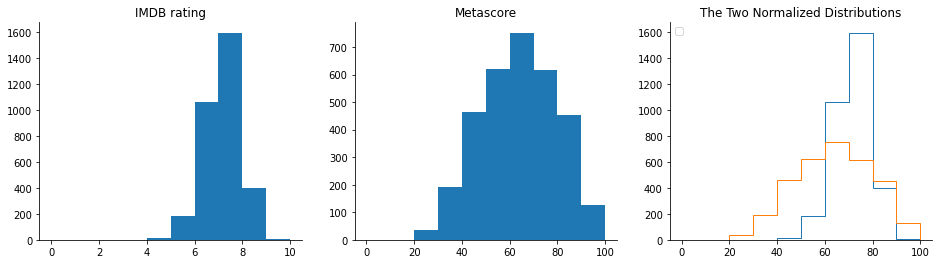

In [49]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')
ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')
ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

Starting with the IMDB histogram, we can see that most ratings are between 6 and 8. There are few movies with a rating greater than 8, and even fewer with a rating smaller than 4. This indicates that both very good movies and very bad movies are rarer.

The distribution of Metascore ratings resembles a normal distribution – most ratings are average, peaking at the value of approximately 50. From this peak, the frequencies gradually decrease toward extreme rating values. According to this distribution, there are indeed fewer very good and very bad movies, but not that few as the IMDB ratings indicate.

On the comparative graph, it’s clearer that the IMDB distribution is highly skewed toward the higher part of the average ratings, while the Metascore ratings seem to have a much more balanced distribution.

What might be the reason for that skew in the IMDB distribution? One hypothesis is that many users tend to have a binary method of assessing movies. If they like the movie, they give it a 10. If they don’t like the movie, they give it a very small rating, or they don’t bother to rate the movie. This an interesting problem that’s worth being explored in more detail.